In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 让matplotlib的图像直接显示在Notebook内
%matplotlib inline


In [13]:
df_province = pd.read_csv("cleaned_Province_Rank.csv")
df_top15 = pd.read_csv("cleaned_top15_movies.csv")
df_rankings = pd.read_csv("cleaned_movie_rankings_2024.csv")

# 检查数据读入情况
print("df_province shape:", df_province.shape)
print("df_top15 shape:", df_top15.shape)
print("df_rankings shape:", df_rankings.shape)


df_province shape: (372, 5)
df_top15 shape: (180, 5)
df_rankings shape: (293, 14)


In [14]:
df_province.info()
df_top15.info()
df_rankings.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   统计时间    372 non-null    object
 1   省区市     372 non-null    object
 2   票房（万元）  372 non-null    int64 
 3   场次      372 non-null    int64 
 4   人次      372 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 14.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   统计时间      180 non-null    object
 1   影片名称      180 non-null    object
 2   票房（万元）    180 non-null    int64 
 3   人次        180 non-null    int64 
 4   累计票房（万元）  180 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 7.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     ------------

In [6]:
df_rankings.rename(columns={
    '地区':'发行地区', 
    '票房':'票房_万',  # 假设这个字段表示“票房（万元）”
    '评分':'豆瓣评分'
}, inplace=True)


In [8]:
df_rankings['上映日期'] = pd.to_datetime(df_rankings['上映日期'], format='%Y-%m-%d')

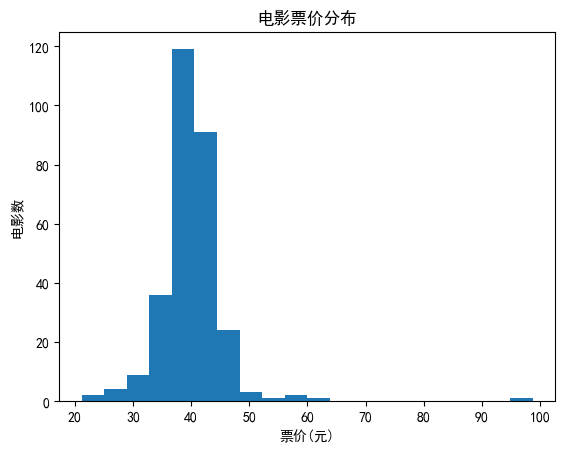

In [12]:
import matplotlib
import matplotlib.pyplot as plt

# 设置支持中文的字体，比如 SimHei、SimSun、Microsoft YaHei
plt.rcParams['font.sans-serif'] = ['SimHei']  # 或者 'SimSun'、'Microsoft YaHei'
plt.rcParams['axes.unicode_minus'] = False    # 用来正常显示坐标轴中的负号

# 然后再进行绘图
plt.hist(df_rankings["平均票价（元）"], bins=20)
plt.title("电影票价分布")
plt.xlabel("票价(元)")
plt.ylabel("电影数")
plt.show()


In [13]:
df_rankings["平均票价（元）"].describe()

count    293.000000
mean      40.047278
std        5.677469
min       21.179955
25%       37.550980
50%       39.906820
75%       41.801548
max       98.712845
Name: 平均票价（元）, dtype: float64

In [14]:
df_rankings[df_rankings["平均票价（元）"] > 50].head(10)

,电影ID,电影名称,排名,票房（万元）,上映日期,平均票价（元）,场均人次,题材,格式,时长,发行地区,豆瓣评分,观众评分人数（万）,想看人数（万）
80,1432006,红毯先生,81,9364,2024-03-15,50.411552,6,"剧情, 喜剧",未知,127.0,中国大陆,8.2,3.0,17.2
167,1431886,志愿军：雄兵出击,168,1188,2023-09-28,98.712845,55,"剧情, 历史, 战争",2DIMAX,140.0,中国大陆,9.6,17.0,33.4
171,1489053,云上的云,172,1129,2024-10-18,60.752970,5,剧情,未知,96.0,中国大陆,8.8,1902.0,4723.0
182,1164582,沙丘,183,913,2021-10-22,58.065450,13,"科幻, 冒险, 动作",2DIMAX,156.0,美国,7.8,10.0,25.5
228,1526267,皇后乐队蒙特利尔现场演唱会,229,383,2024-12-06,51.249165,4,"纪录片, 音乐",2DIMAX,96.0,美国,9.6,8361.0,1.2
260,1443924,奥本海默,261,226,2023-08-30,56.470207,10,"剧情, 传记, 历史",2DIMAX,181.0,美国,9.3,11.0,35.9
271,1300093,吾爱敦煌,272,192,2023-11-17,53.094337,20,"剧情, 传记, 历史",未知,100.0,中国大陆,NaN,0.0,0.0


In [15]:
##票房 vs. 票价（散点图）

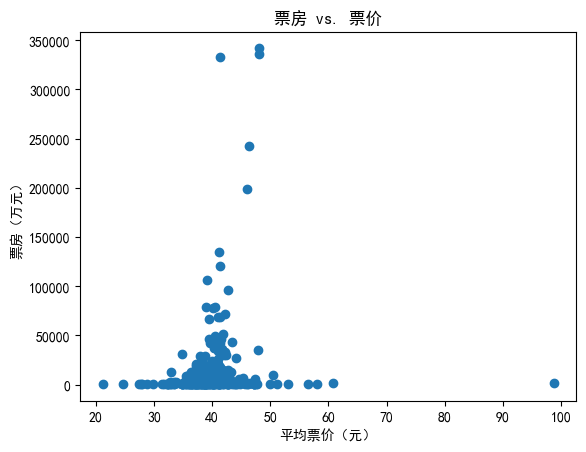

In [15]:
plt.scatter(
    df_rankings["平均票价（元）"], 
    df_rankings["票房（万元）"]
)
plt.xlabel("平均票价（元）")
plt.ylabel("票房（万元）")
plt.title("票房 vs. 票价")
plt.show()

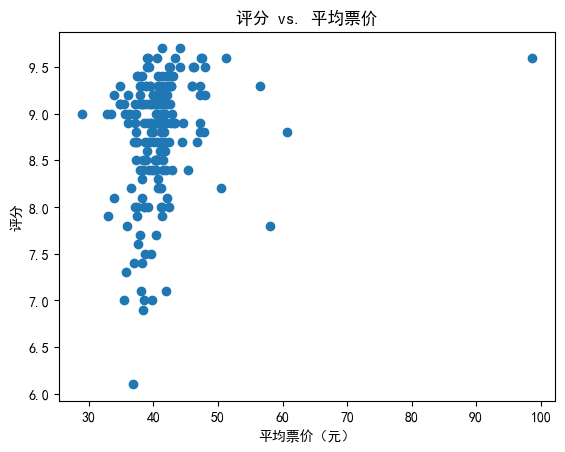

In [18]:
plt.scatter(
    df_rankings["平均票价（元）"], 
    df_rankings["评分"]
)
plt.xlabel("平均票价（元）")
plt.ylabel("评分")
plt.title("评分 vs. 平均票价")
plt.show()


In [20]:
# 计算相关系数
corr_pf = df_rankings["平均票价（元）"].corr(df_rankings["票房（万元）"])
corr_pingfen = df_rankings["平均票价（元）"].corr(df_rankings["评分"])

# 打印结果
print("票房与票价的相关系数:", corr_pf)
print("评分与票价的相关系数:", corr_pingfen)


票房与票价的相关系数: 0.14264394612924958
评分与票价的相关系数: 0.2079877887858079


In [21]:
##1. 观影人次 vs. 票房：探讨电影受欢迎度

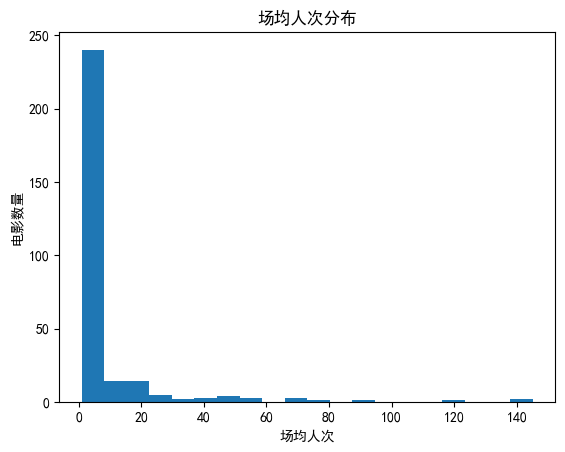

In [22]:
plt.hist(df_rankings["场均人次"].dropna(), bins=20)
plt.title("场均人次分布")
plt.xlabel("场均人次")
plt.ylabel("电影数量")
plt.show()

In [23]:
 ##“场均人次” 与 票房的关系

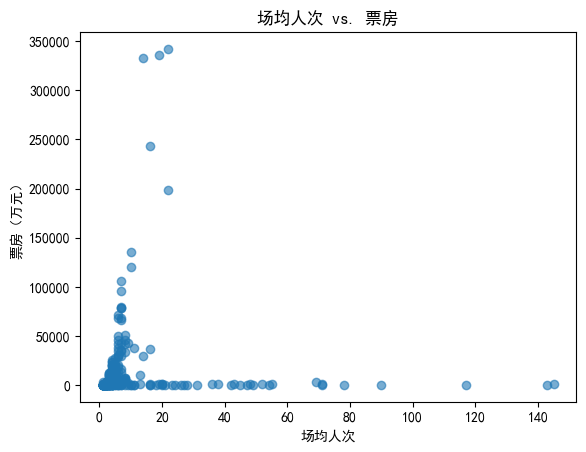

场均人次 与 票房的相关系数: 0.026457555113644476


In [21]:
plt.scatter(df_rankings["场均人次"], df_rankings["票房（万元）"], alpha=0.6)
plt.title("场均人次 vs. 票房")
plt.xlabel("场均人次")
plt.ylabel("票房（万元）")
plt.show()

corr_value = df_rankings["场均人次"].corr(df_rankings["票房（万元）"])
print("场均人次 与 票房的相关系数:", corr_value)


In [25]:
##时长 vs. 豆瓣评分：片长会影响口碑吗？

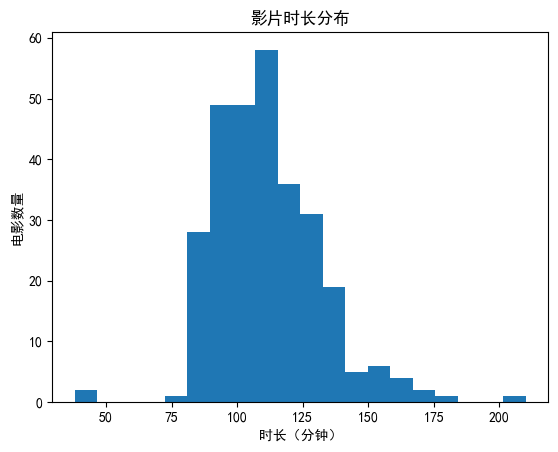

In [22]:
plt.hist(df_rankings["时长"].dropna(), bins=20)
plt.title("影片时长分布")
plt.xlabel("时长（分钟）")
plt.ylabel("电影数量")
plt.show()


In [27]:
##观察主流影片是 90-120 分钟

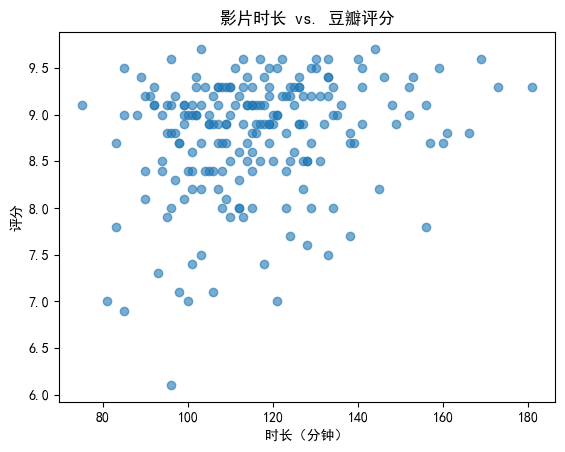

时长与评分的相关系数: 0.22462614862777427


In [25]:
##散点图：时长 vs. 豆瓣评分

plt.scatter(
    df_rankings["时长"], 
    df_rankings["评分"], 
    alpha=0.6
)
plt.xlabel("时长（分钟）")
plt.ylabel("评分")
plt.title("影片时长 vs. 豆瓣评分")
plt.show()

corr_len_score = df_rankings["时长"].corr(df_rankings["评分"])
print("时长与评分的相关系数:", corr_len_score)

In [29]:
##“想看人数” vs. 实际票房：观众预期能否转化成票房？

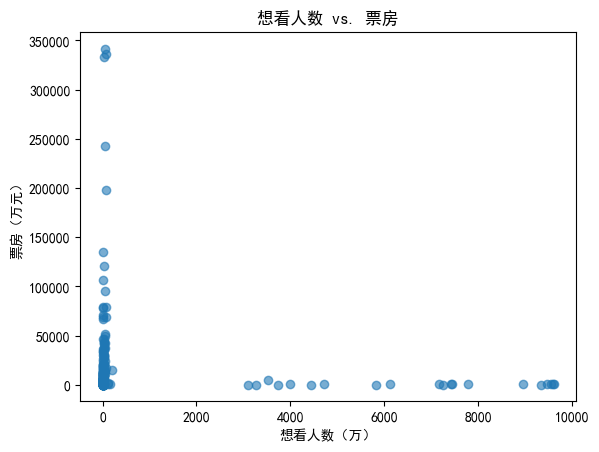

想看人数 与 票房的相关系数: -0.07997014632682847


In [30]:
##“想看人数”是上映前后观众在平台上标注“想看”的数量，通常是对电影前期热度的一个指标。我们看看它跟实际票房关联度如何。

##散点图 + 相关系数

plt.scatter(
    df_rankings["想看人数（万）"], 
    df_rankings["票房（万元）"], 
    alpha=0.6
)
plt.xlabel("想看人数（万）")
plt.ylabel("票房（万元）")
plt.title("想看人数 vs. 票房")
plt.show()

corr_want = df_rankings["想看人数（万）"].corr(df_rankings["票房（万元）"])
print("想看人数 与 票房的相关系数:", corr_want)


In [32]:
##大样本 vs. 小样本

df_mismatch = df_rankings[
    (df_rankings["想看人数（万）"] > df_rankings["想看人数（万）"].mean()) &
    (df_rankings["票房（万元）"] < df_rankings["票房（万元）"].mean())
]
df_mismatch[["电影名称", "想看人数（万）", "票房（万元）", "豆瓣评分"]]

##  “想看人数”远高于平均但票房不佳的影片

,电影名称,想看人数（万）,票房（万元）,豆瓣评分
104,里斯本丸沉没,3532.0,4737,9.6
171,云上的云,4723.0,1129,8.8
178,泳者之心,3986.0,1021,9.6
186,雪豹,6126.0,848,9.3
204,老枪,9468.0,563,8.5
210,盟军敢死队,7170.0,520,8.5
217,如父如子,9607.0,433,9.0
229,挑战,7780.0,373,8.9
235,狗神,9602.0,345,9.1
237,富都青年,7436.0,342,8.4


In [33]:
##题材 vs. 票房、评分：哪种类型最受欢迎？

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 假设 df_rankings 的 "题材" 列是以逗号+空格分隔的，如 "科幻, 冒险, 动作"
df_exploded = df_rankings.copy()
df_exploded["题材"] = df_exploded["题材"].str.split(", ")  # 拆分成列表
df_exploded = df_exploded.explode("题材")  # 展开成多行

# 查看数据处理后的效果
print(df_exploded[["电影名称", "题材", "票房（万元）", "评分"]].head())


    电影名称  题材  票房（万元）   评分
0   热辣滚烫  喜剧  341720  9.2
0   热辣滚烫  剧情  341720  9.2
1  飞驰人生2  喜剧  336084  9.5
1  飞驰人生2  剧情  336084  9.5
2    抓娃娃  喜剧  332747  9.4


In [102]:
#1. 识别“最赚钱”的电影类型
type_total_stats.sort_values("票房（万元）", ascending=False).head(5)

,题材,票房（万元）,豆瓣评分
5,剧情,2766256,857.8
11,喜剧,2087183,412.8
6,动作,787046,367.9
7,动画,692027,374.6
28,犯罪,613751,219.8


In [98]:
# 识别电影数量最多的前5种类型
df_exploded["题材"].value_counts().head(5)

题材
剧情    137
喜剧     64
动画     55
冒险     47
动作     44
Name: count, dtype: int64

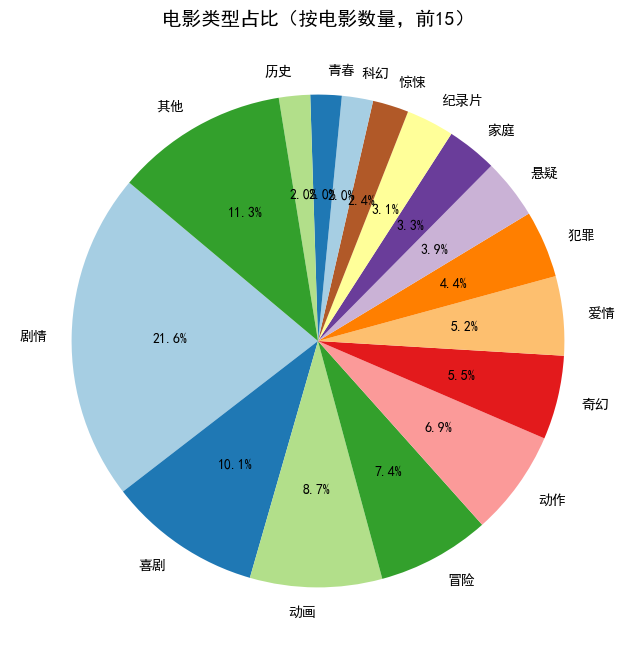

In [96]:
import matplotlib.pyplot as plt
import pandas as pd

# 计算每种电影类型的数量
type_counts = df_exploded["题材"].value_counts()

# 只显示前15大类型，其余归为“其他”
top_n = 15
top_types = type_counts.head(top_n)
other_count = type_counts.iloc[top_n:].sum()
type_counts_filtered = pd.concat([top_types, pd.Series(other_count, index=["其他"])])

# 绘制饼状图
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(type_counts_filtered, labels=type_counts_filtered.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

# 设置标题
ax.set_title(f"电影类型占比（按电影数量，前{top_n}）", fontsize=14)

# 显示图表
plt.show()

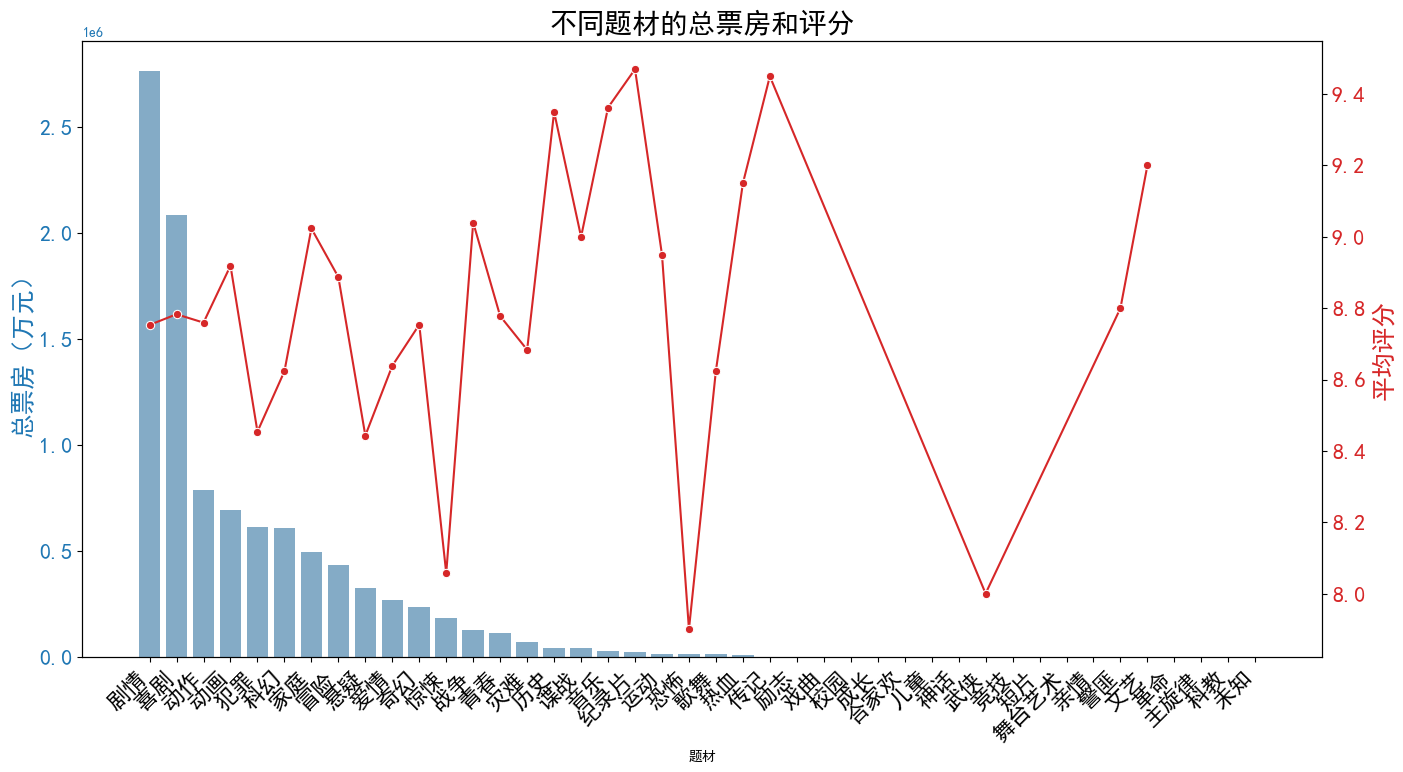

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# 解决中文显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设为黑体
plt.rcParams['axes.unicode_minus'] = False   # 解决负号显示问题

# 计算每种题材的“总票房”和“平均评分”
type_total_stats = df_exploded.groupby("题材").agg(
    {"票房（万元）": "sum", "评分": "mean"}
).reset_index()

# 按总票房排序
type_total_stats = type_total_stats.sort_values("票房（万元）", ascending=False)

# 创建画布
fig, ax1 = plt.subplots(figsize=(16,8))

# 票房柱状图（左轴）
color1 = "tab:blue"
ax1.set_ylabel("总票房（万元）", fontsize=18, color=color1)
sns.barplot(data=type_total_stats, x="题材", y="票房（万元）", color=color1, alpha=0.6, ax=ax1)
ax1.tick_params(axis='y', labelcolor=color1, labelsize=16)  

# 解决 `set_xticklabels()` 警告
ax1.set_xticks(range(len(type_total_stats["题材"])))  # 先设置刻度
ax1.set_xticklabels(type_total_stats["题材"], rotation=45, ha="right", fontsize=16)

# 创建右轴
ax2 = ax1.twinx()
color2 = "tab:red"
ax2.set_ylabel("平均评分", fontsize=18, color=color2)
sns.lineplot(data=type_total_stats, x="题材", y="评分", color=color2, marker="o", ax=ax2)
ax2.tick_params(axis='y', labelcolor=color2, labelsize=16)

# 设置标题
plt.title("不同题材的总票房和评分", fontsize=20, fontweight='bold')
plt.xlabel("题材", fontsize=18)
plt.show()

In [63]:
import pandas as pd

# 创建一个字典来存储结果
top_movies_by_category = {}

top_categories = ["剧情", "喜剧", "动作", "动画", "犯罪"]  # 票房最高的前5个类型
for cat in top_categories:
    # 在爆炸处理（explode）后的 DataFrame 中筛选这个类型
    cat_df = df_exploded[df_exploded["题材"] == cat].copy()
    cat_df = cat_df.sort_values("票房（万元）", ascending=False)

    # 计算该类型的总票房
    total_cat_box = cat_df["票房（万元）"].sum()

    # 取票房最高的前3部电影
    top3 = cat_df.head(3)
    top3_box = top3["票房（万元）"].sum()

    # 存入字典
    top_movies_by_category[cat] = {
        "总票房": total_cat_box,
        "头部3部电影票房": top3_box,
        "占比": f"{top3_box / total_cat_box:.2%}",
        "头部电影": [
            {
                "电影ID": row["电影ID"],
                "电影名称": row["电影名称"],
                "票房": row["票房（万元）"],
                "豆瓣评分": row["豆瓣评分"],
                "上映日期": row["上映日期"]
            }
            for _, row in top3.iterrows()
        ]
    }

# 打印结果
for cat, data in top_movies_by_category.items():
    print(f"类型：{cat}")
    print(f"  总票房：{data['总票房']} 万元")
    print(f"  头部3部电影票房：{data['头部3部电影票房']} 万元，占比：{data['占比']}")
    print("  头部电影：")
    for movie in data["头部电影"]:
        print(f"    - {movie['电影名称']}（ID: {movie['电影ID']}） | 票房：{movie['票房']} 万元 | 评分：{movie['豆瓣评分']} | 上映日期：{movie['上映日期']}")
    print("-" * 50)


类型：剧情
  总票房：2766256 万元
  头部3部电影票房：1010551 万元，占比：36.53%
  头部电影：
    - 热辣滚烫（ID: 1478901） | 票房：341720 万元 | 评分：9.2 | 上映日期：2024-02-10 00:00:00
    - 飞驰人生2（ID: 1495728） | 票房：336084 万元 | 评分：9.5 | 上映日期：2024-02-10 00:00:00
    - 抓娃娃（ID: 1516983） | 票房：332747 万元 | 评分：9.4 | 上映日期：2024-07-16 00:00:00
--------------------------------------------------
类型：喜剧
  总票房：2087183 万元
  头部3部电影票房：1010551 万元，占比：48.42%
  头部电影：
    - 热辣滚烫（ID: 1478901） | 票房：341720 万元 | 评分：9.2 | 上映日期：2024-02-10 00:00:00
    - 飞驰人生2（ID: 1495728） | 票房：336084 万元 | 评分：9.5 | 上映日期：2024-02-10 00:00:00
    - 抓娃娃（ID: 1516983） | 票房：332747 万元 | 评分：9.4 | 上映日期：2024-07-16 00:00:00
--------------------------------------------------
类型：动作
  总票房：787046 万元
  头部3部电影票房：232631 万元，占比：29.56%
  头部电影：
    - 哥斯拉大战金刚2：帝国崛起（ID: 1470629） | 票房：95693 万元 | 评分：9.3 | 上映日期：2024-03-29 00:00:00
    - 九龙城寨之围城（ID: 78645） | 票房：68500 万元 | 评分：9.3 | 上映日期：2024-05-01 00:00:00
    - 毒液：最后一舞（ID: 1448719） | 票房：68438 万元 | 评分：8.7 | 上映日期：2024-10-23 00:00:00
--------------------------

In [64]:
print(top_movies_by_category.keys())  # 查看是否正确生成


dict_keys(['剧情', '喜剧', '动作', '动画', '犯罪'])


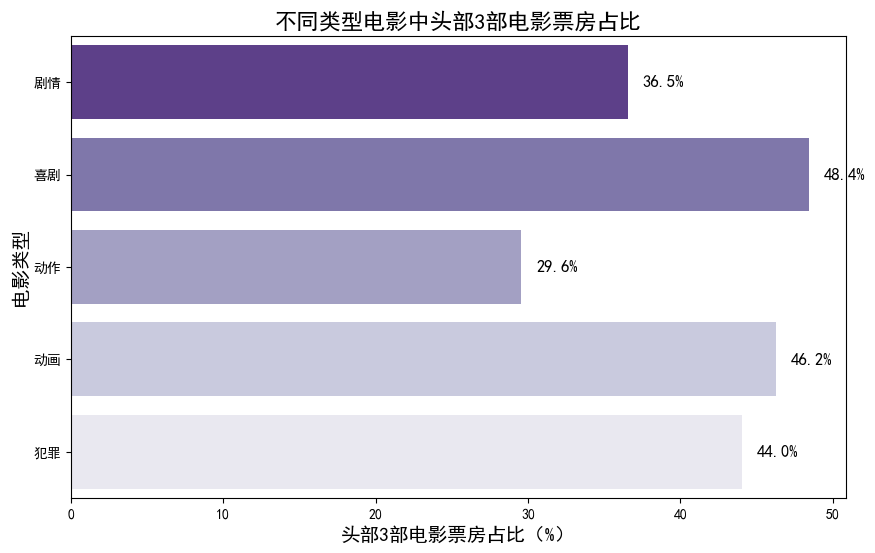

In [67]:
fig, ax = plt.subplots(figsize=(10, 6))

# 绘制水平条形图，避免 palette 相关的 FutureWarning
sns.barplot(data=df_plot, x="占比", y="类型", hue="类型", dodge=False, palette="Purples_r", ax=ax)

# 添加数据标签
for index, value in enumerate(df_plot["占比"]):
    ax.text(value + 1, index, f"{value:.1f}%", va='center', fontsize=12)

# 设置标题和标签
ax.set_xlabel("头部3部电影票房占比（%）", fontsize=14)
ax.set_ylabel("电影类型", fontsize=14)
ax.set_title("不同类型电影中头部3部电影票房占比", fontsize=16, fontweight='bold')

# 隐藏图例，因为颜色只是装饰
ax.legend([], [], frameon=False)

# 显示图表
plt.show()


### 🎯 头部电影票房贡献分析

- **喜剧电影头部贡献最大（48.4%）**
  - 近一半的喜剧片票房**由头部3部电影贡献**，说明该类型票房高度集中。

- **动画片头部贡献占比（46.2%）**
  - **动画片的头部效应强**，主要靠少数几部票房超高的作品支撑市场。

- **犯罪片头部贡献（44.0%）**
  - 说明该类型的电影**整体票房较少，但头部影片有较强吸引力**，容易出现爆款。

- **剧情（36.5%）和动作（29.6%）的头部贡献较低**
  - 说明这两个类型的电影**票房较均衡，不完全依赖少数爆款**。


剔除前十

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. 找出票房最高的前10部电影
top_10_movies = df_exploded.sort_values("票房（万元）", ascending=False).head(10)
excluded_ids = top_10_movies["电影ID"].tolist()

# 2. 剔除这10部电影后的数据
df_no_top = df_exploded[~df_exploded["电影ID"].isin(excluded_ids)].copy()

# 3. 计算剔除前的类型总票房
type_original_stats = df_exploded.groupby("题材")["票房（万元）"].sum().reset_index()
type_original_stats = type_original_stats.sort_values("票房（万元）", ascending=False)

# 4. 计算剔除后类型总票房
type_no_top_stats = df_no_top.groupby("题材")["票房（万元）"].sum().reset_index()
type_no_top_stats = type_no_top_stats.sort_values("票房（万元）", ascending=False)

# 5. 仅保留剔除前票房最高的前10个类型（防止图表过于拥挤）
top_10_types = type_original_stats.head(10)["题材"].tolist()
filtered_original_stats = type_original_stats[type_original_stats["题材"].isin(top_10_types)]
filtered_no_top_stats = type_no_top_stats[type_no_top_stats["题材"].isin(top_10_types)]

# 6. 合并剔除前后的票房数据
merged_stats = filtered_original_stats.merge(filtered_no_top_stats, on="题材", suffixes=("_剔除前", "_剔除后"))

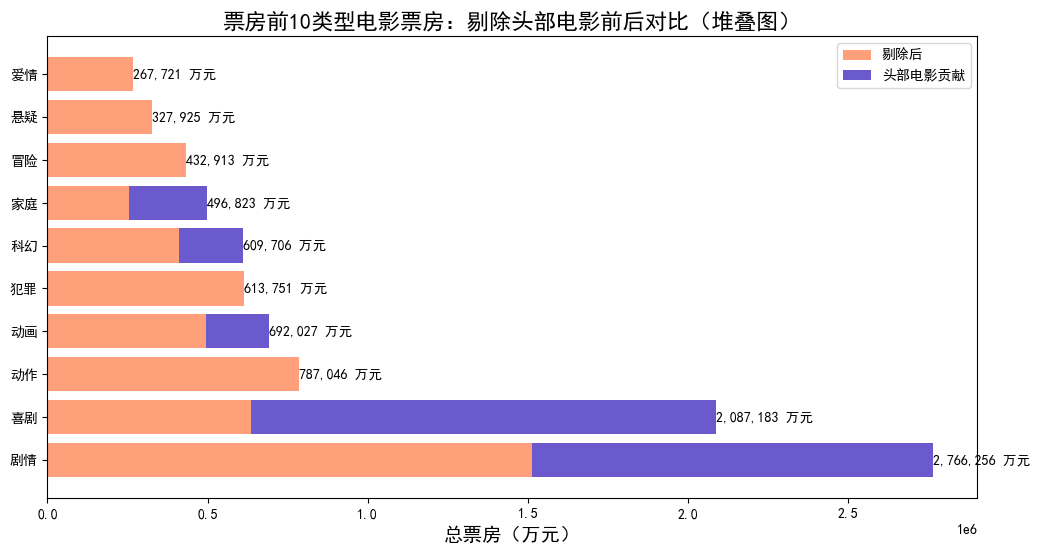

In [92]:
# 7. 绘制剔除前后的票房对比（堆叠条形图）
fig, ax = plt.subplots(figsize=(12, 6))

# 计算总票房变化
total_before = merged_stats["票房（万元）_剔除前"]
total_after = merged_stats["票房（万元）_剔除后"]
difference = total_before - total_after

# 颜色配置
color_before = "#6a5acd"  # 紫色（表示被剔除的票房）
color_after = "#ffa07a"   # 橙色（表示剔除后的票房）

# 画剔除后的票房（作为底部）
ax.barh(merged_stats["题材"], total_after, color=color_after, label="剔除后")

# 画减少的部分（头部电影贡献）
ax.barh(merged_stats["题材"], difference, left=total_after, color=color_before, label="头部电影贡献")

# 8. 添加数据标签
for index, value in enumerate(total_before):
    ax.text(value + 1, index, f"{value:,} 万元", va='center', fontsize=10, color="black")

# 9. 设置标题和标签
ax.set_xlabel("总票房（万元）", fontsize=14)
ax.set_title("票房前10类型电影票房：剔除头部电影前后对比（堆叠图）", fontsize=16, fontweight='bold')
ax.legend()

# 10. 显示图表
plt.show()


🎯 结论：

剧情片和喜剧片的头部电影贡献特别大，剔除后票房下降显著 → 说明这两个类型对头部电影依赖很高。

家庭片在剔除后依然排名靠前 → 说明这个类型的票房分布更均匀，不完全依赖头部电影。

动画片和科幻片的头部电影贡献较多，但剔除后仍保持较高票房 → 说明这些类型的市场较大，即使剔除头部电影，仍然有较好的整体票房表现。

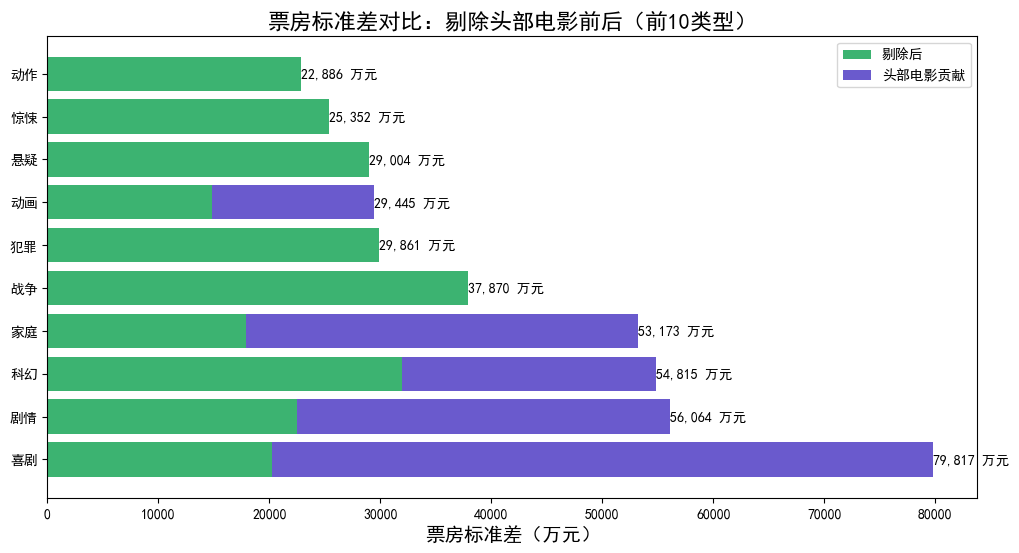

In [89]:
import numpy as np
import matplotlib.pyplot as plt

# 计算剔除前后的票房标准差
std_original = df_exploded.groupby("题材")["票房（万元）"].std().reset_index()
std_original.columns = ["题材", "票房标准差_剔除前"]

std_no_top = df_no_top.groupby("题材")["票房（万元）"].std().reset_index()
std_no_top.columns = ["题材", "票房标准差_剔除后"]

# 合并数据
std_merged = std_original.merge(std_no_top, on="题材", how="inner")

# 仅保留票房标准差最高的前10个类型，避免过多类别导致图表混乱
std_merged_top10 = std_merged.nlargest(10, "票房标准差_剔除前")

# 重新绘制标准差对比堆叠条形图
fig, ax = plt.subplots(figsize=(12, 6))

# 计算变化量
difference = std_merged_top10["票房标准差_剔除前"] - std_merged_top10["票房标准差_剔除后"]

# 颜色配置
color_before = "#6a5acd"  # 紫色（表示被剔除的部分）
color_after = "#3CB371"   # 绿色（表示剔除后的票房标准差）

# 画剔除后的票房标准差（作为底部）
ax.barh(std_merged_top10["题材"], std_merged_top10["票房标准差_剔除后"], color=color_after, label="剔除后")

# 画减少的部分（头部电影贡献）
ax.barh(std_merged_top10["题材"], difference, left=std_merged_top10["票房标准差_剔除后"], color=color_before, label="头部电影贡献")

# 添加数据标签
for index, value in enumerate(std_merged_top10["票房标准差_剔除前"]):
    ax.text(value + 1, index, f"{value:,.0f} 万元", va='center', fontsize=10, color="black")

# 设置标题和标签
ax.set_xlabel("票房标准差（万元）", fontsize=14)
ax.set_title("票房标准差对比：剔除头部电影前后（前10类型）", fontsize=16, fontweight='bold')
ax.legend()

# 显示图表
plt.show()


剧情、喜剧、科幻类型的标准差下降明显 → 说明这些类型原本票房高度依赖头部电影，普通电影票房较低。

动画、战争、犯罪类型的标准差变化相对较小 → 说明这些类型的票房分布更均匀，普通电影的票房也较为稳定。

家庭片标准差下降幅度适中 → 说明它虽然受头部电影影响，但市场本身仍较为稳定。

📌 总体结论

1️⃣ 电影市场健康度
高标准差（竞争不均衡）：
剧情、喜剧、科幻：市场主要靠头部电影支撑，普通电影票房低，风险较高。
低标准差（市场更稳定）：
动画、战争、犯罪：普通电影也有较好票房，市场更加健康。

2️⃣ 票房依赖程度
高度依赖头部电影的类型：
剧情、喜剧、科幻：剔除后票房大幅下降，市场依赖少数大片。
相对独立的类型：
动画、战争、家庭：剔除后票房仍较高，说明普通电影也能贡献票房。

3️⃣ 剧情片的特殊性
虽然剔除头部电影后，剧情片仍然是票房最高的类型，但它的标准差也非常高。
这意味着剧情片的市场很大，但竞争极端不均衡，普通剧情片的票房很难接近头部作品。


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_65680\2423552551.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right", fontsize=12)


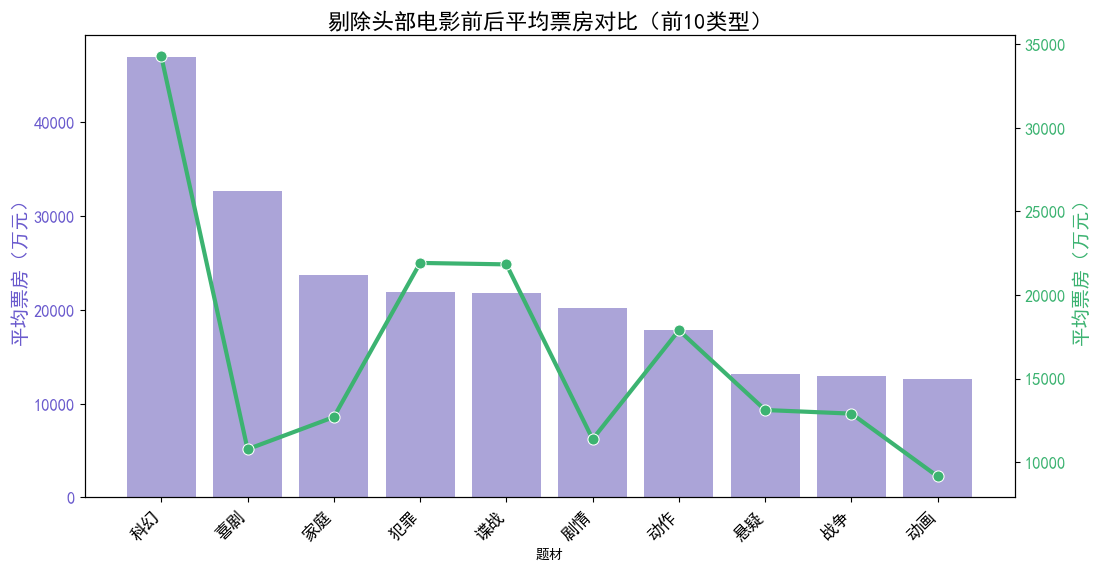

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

# 计算剔除前后的平均票房
avg_original = df_exploded.groupby("题材")["票房（万元）"].mean().reset_index()
avg_original.columns = ["题材", "平均票房_剔除前"]

avg_no_top = df_no_top.groupby("题材")["票房（万元）"].mean().reset_index()
avg_no_top.columns = ["题材", "平均票房_剔除后"]

# 合并数据
avg_merged = avg_original.merge(avg_no_top, on="题材", how="inner")

# 仅保留平均票房最高的前10个类型，避免过多类别导致图表混乱
avg_merged_top10 = avg_merged.nlargest(10, "平均票房_剔除前")



# 创建画布
fig, ax1 = plt.subplots(figsize=(12, 6))

# 颜色配置
color1 = "#6a5acd"  # 紫色（剔除前）
color2 = "#3CB371"  # 绿色（剔除后）

# 左侧 Y 轴 - 平均票房（剔除前）
ax1.set_ylabel("平均票房（万元）", fontsize=14, color=color1)
sns.barplot(data=avg_merged_top10, x="题材", y="平均票房_剔除前", color=color1, alpha=0.6, ax=ax1)
ax1.tick_params(axis='y', labelcolor=color1, labelsize=12)  
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right", fontsize=12)  

# 右侧 Y 轴 - 平均票房（剔除后）
ax2 = ax1.twinx()  # 创建一个共享 X 轴的 Y 轴
ax2.set_ylabel("平均票房（万元）", fontsize=14, color=color2)
sns.lineplot(data=avg_merged_top10, x="题材", y="平均票房_剔除后", color=color2, marker="o", linewidth=3, markersize=8, ax=ax2)
ax2.tick_params(axis='y', labelcolor=color2, labelsize=12)

# 设置标题
plt.title("剔除头部电影前后平均票房对比（前10类型）", fontsize=16, fontweight='bold')
plt.xlabel("题材", fontsize=14)

# 显示图表
plt.show()


In [51]:
##再下一个环节

In [50]:
#ip效应
df_exploded[df_exploded["电影名称"].str.contains("2|3|4|终章|宇宙")]


,电影ID,电影名称,排名,票房（万元）,上映日期,平均票价（元）,场均人次,题材,格式,时长,发行地区,豆瓣评分,观众评分人数（万）,想看人数（万）
1,1495728,飞驰人生2,2,336084,2024-02-10,48.021935,19,喜剧,2DIMAX,121.0,中国大陆,9.5,56.0,79.7
1,1495728,飞驰人生2,2,336084,2024-02-10,48.021935,19,剧情,2DIMAX,121.0,中国大陆,9.5,56.0,79.7
8,1470629,哥斯拉大战金刚2：帝国崛起,9,95693,2024-03-29,42.801796,7,动作,3DIMAX,115.0,美国,9.3,16.0,50.4
8,1470629,哥斯拉大战金刚2：帝国崛起,9,95693,2024-03-29,42.801796,7,冒险,3DIMAX,115.0,美国,9.3,16.0,50.4
8,1470629,哥斯拉大战金刚2：帝国崛起,9,95693,2024-03-29,42.801796,7,科幻,3DIMAX,115.0,美国,9.3,16.0,50.4
22,1219664,神偷奶爸4,23,42397,2024-07-12,39.673447,8,喜剧,3D,97.0,美国,8.8,6.0,31.6
22,1219664,神偷奶爸4,23,42397,2024-07-12,39.673447,8,动作,3D,97.0,美国,8.8,6.0,31.6
22,1219664,神偷奶爸4,23,42397,2024-07-12,39.673447,8,动画,3D,97.0,美国,8.8,6.0,31.6
24,346109,749局,25,37572,2024-10-01,41.159866,11,科幻,2DIMAX,123.0,中国大陆,8.0,24.0,37.1
24,346109,749局,25,37572,2024-10-01,41.159866,11,冒险,2DIMAX,123.0,中国大陆,8.0,24.0,37.1
